In [2]:
!pip install geopy


  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
  Using cached geopy-2.4.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Using cached geopy-2.4.0-py3-none-any.whl (125 kB)


In [9]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [10]:
# Load route data
route_data = pd.read_csv('route_data.csv')

In [11]:
# Create a graph from the data
G = nx.Graph()

In [12]:
# Add nodes to the graph
for index, row in route_data.iterrows():
    G.add_node(row['location_id'], pos=(row['latitude'], row['longitude']))

In [13]:
# Add edges with distances as attributes
for i in range(len(route_data)):
    for j in range(i + 1, len(route_data)):
        loc1 = route_data.iloc[i]
        loc2 = route_data.iloc[j]
        distance = geodesic((loc1['latitude'], loc1['longitude']), (loc2['latitude'], loc2['longitude'])).miles
        G.add_edge(loc1['location_id'], loc2['location_id'], distance=distance)

In [14]:
# Solve the Travelling Salesman Problem
tsp_path = nx.approximation.traveling_salesman_problem(G, cycle=True)

In [15]:
# Extract optimized route data
optimized_route_data = route_data[route_data['location_id'].isin(tsp_path)]

In [16]:
# Display the optimized route
print("Optimized Route:")
print(optimized_route_data[['location_id', 'location_name', 'latitude', 'longitude']])

Optimized Route:
   location_id location_name  latitude  longitude
0            1    Location_A   40.7128   -74.0060
1            2    Location_B   34.0522  -118.2437
2            3    Location_C   41.8781   -87.6298
3            4    Location_D   37.7749  -122.4194
4            5    Location_E   51.5074    -0.1278
5            6    Location_F   35.6895   139.6917
6            7    Location_G  -33.8688   151.2093
7            8    Location_H   55.7558    37.6176
8            9    Location_I  -22.9083   -43.1964
9           10    Location_J  -33.9258    18.4232


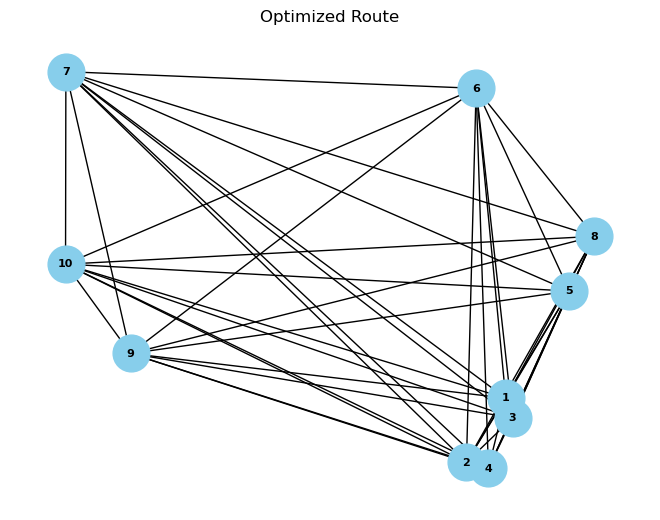

In [17]:
# Plot the optimized route
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_color='black', font_size=8)
plt.title('Optimized Route')
plt.show()